In [654]:
import pandas as pd
import pickle
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [655]:
file = "datasets/diabetes.csv"

In [656]:
data = pd.read_csv(file)

In [657]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [658]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 768 entries, 0 to 767

Data columns (total 9 columns):

 #   Column                    Non-Null Count  Dtype  

---  ------                    --------------  -----  

 0   Pregnancies               768 non-null    int64  

 1   Glucose                   768 non-null    int64  

 2   BloodPressure             768 non-null    int64  

 3   SkinThickness             768 non-null    int64  

 4   Insulin                   768 non-null    int64  

 5   BMI                       768 non-null    float64

 6   DiabetesPedigreeFunction  768 non-null    float64

 7   Age                       768 non-null    int64  

 8   Outcome                   768 non-null    int64  

dtypes: float64(2), int64(7)

memory usage: 54.1 KB


In [659]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [660]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [661]:
%matplotlib inline

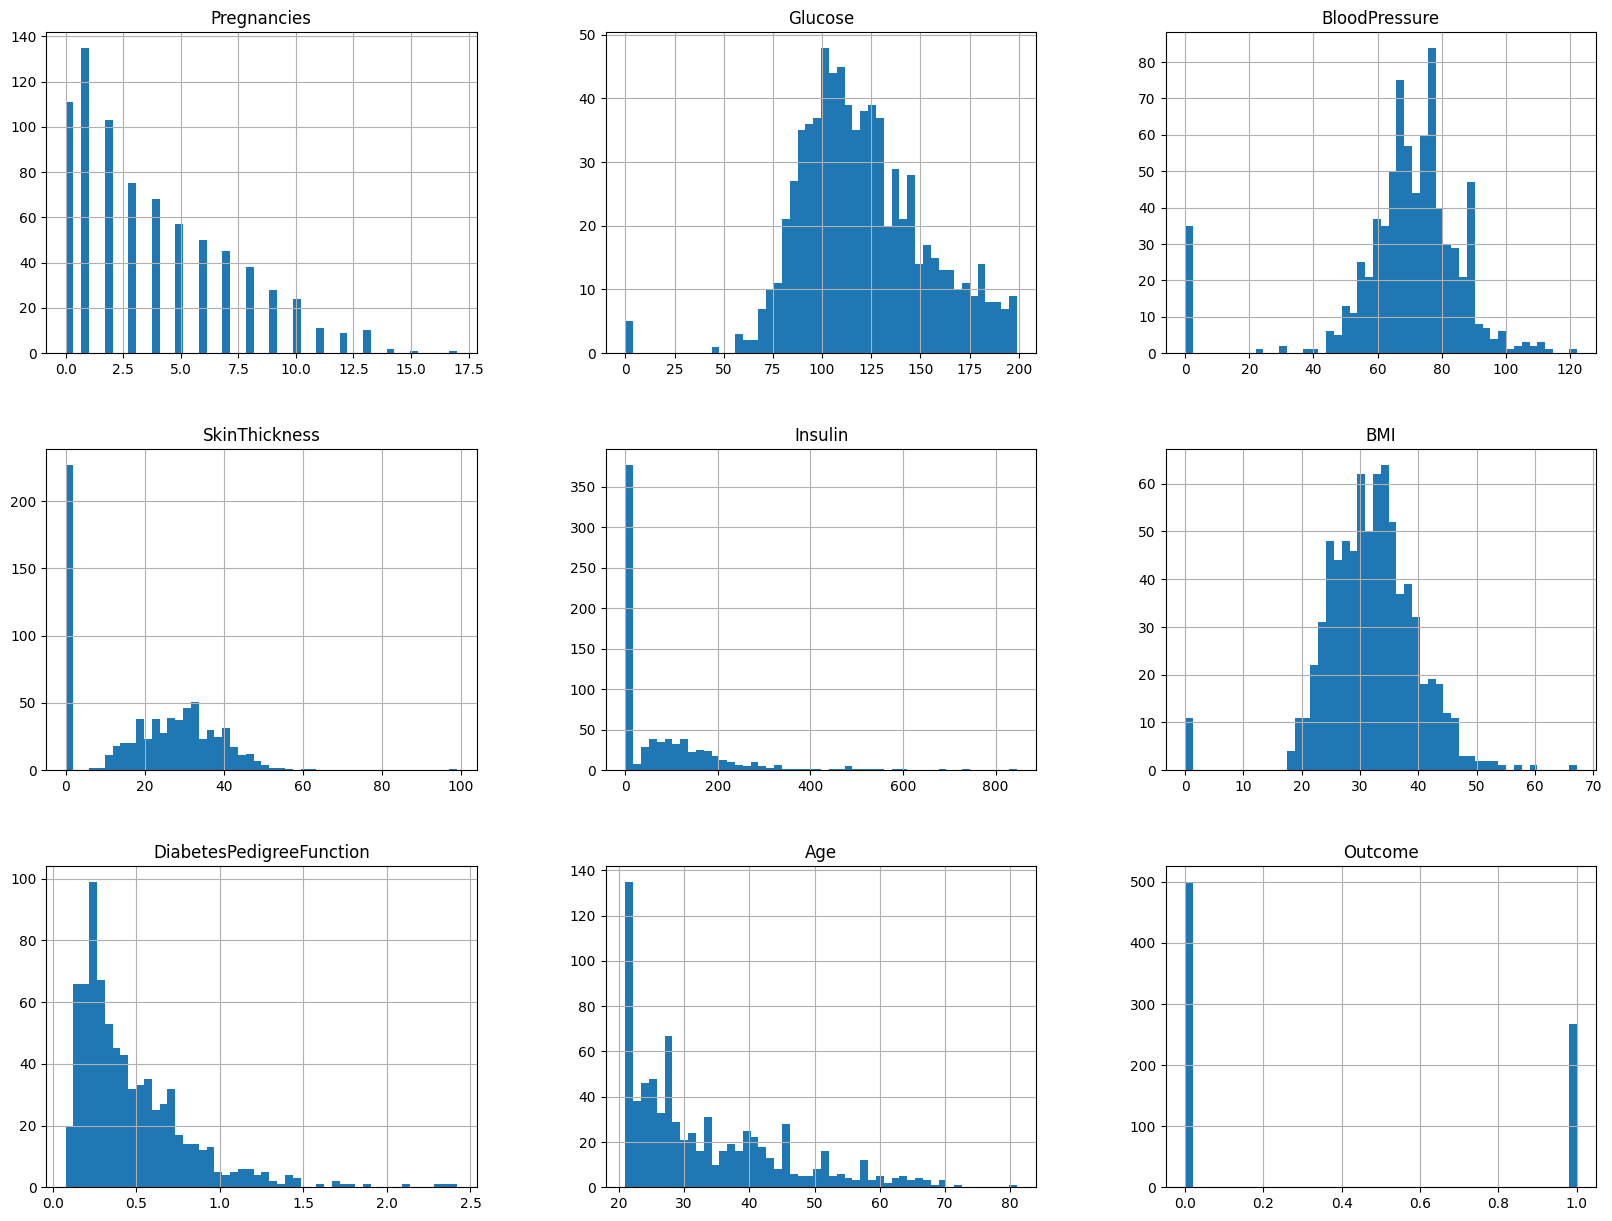

In [662]:
data.hist(bins=50,figsize=(20,15))
plt.show();

In [663]:
print("Blood Pressure range:", data.BloodPressure.min(), data.BloodPressure.max())
print("Age range:", data.Age.min(),data.Age.max())
print("Glucose range:", data.Glucose.min(),data.Glucose.max())

Blood Pressure range: 0 122

Age range: 21 81

Glucose range: 0 199


## Создание набора данных для теста и обучения

In [664]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [665]:
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

Y = data.Outcome
data = data.drop('Outcome', axis = 1)


In [666]:
data_prepared = pipeline.fit_transform(data)
data_train, data_test, Y_train, Y_test = train_test_split(data_prepared, Y, test_size = 0.20)

In [667]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [668]:
##Линейная регресия

In [669]:
linearRegressor = LinearRegression()

In [670]:
param_grid = [
    {
        'copy_X': [False], 'fit_intercept': [False]
    }, 
    {
        'fit_intercept': [False]
    }
]
grid_search = GridSearchCV(linearRegressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_train,Y_train)

grid_search.best_params_

{'copy_X': False, 'fit_intercept': False}

In [671]:
linearRegressor = LinearRegression(copy_X=False, fit_intercept=False)
linearRegressor.fit(data_train, Y_train)
Y_pred = linearRegressor.predict(data_test)

file = open('models/linearRegression.pkl', 'wb')
pickle.dump(linearRegressor, file, pickle.HIGHEST_PROTOCOL)
file.close()

file = open('bestParams/linearRegressionParameters.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

print("Y:\n", list(Y_test.iloc[:5]))
print("Прогноз Y:\n", list(Y_pred[:5]))

Y:

 [0, 1, 1, 1, 1]

Прогноз Y:

 [0.058619625905833604, 0.2877279620714485, 0.33724518646742824, 0.47228036794999895, 0.41970517200703134]


In [672]:
##Матрица ошибок

In [673]:
print("Матрица ошибок")
print(confusion_matrix(Y_test,Y_pred.round()))
print(classification_report(Y_test,Y_pred.round()))

Матрица ошибок

[[ 0  0  0]

 [ 3 92  0]

 [ 0 55  4]]

              precision    recall  f1-score   support



        -1.0       0.00      0.00      0.00         0

         0.0       0.63      0.97      0.76        95

         1.0       1.00      0.07      0.13        59



    accuracy                           0.62       154

   macro avg       0.54      0.35      0.30       154

weighted avg       0.77      0.62      0.52       154




C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))


In [674]:
##оценка качества бинарной классификации

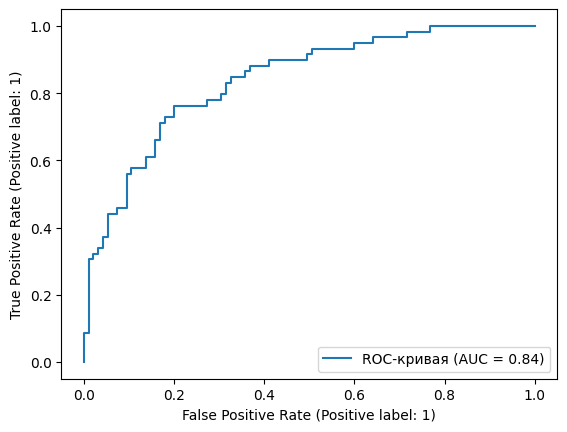

In [675]:
RocCurveDisplay.from_predictions(Y_test, Y_pred, name="ROC-кривая")

In [676]:
##случайный лес(Random Forest, RF)

In [677]:
randomForestRegressor = RandomForestRegressor()

In [678]:
randomForestRegressor.get_params()
param_grid = [
    {
        'n_estimators':[4,15,40], 'max_features':[3,5,8]
    }, 
    {
        'bootstrap':[False],'n_estimators':[4,15,40]  
    }
]
grid_search = GridSearchCV(randomForestRegressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,Y)

grid_search.best_params_

{'max_features': 3, 'n_estimators': 40}

In [679]:
randomForestRegressor = RandomForestRegressor(max_features=5, n_estimators=40)
randomForestRegressor.fit(data_train, Y_train)
Y_pred = randomForestRegressor.predict(data_test)

file = open('models/randomForest.pkl', 'wb')
pickle.dump(randomForestRegressor, file, pickle.HIGHEST_PROTOCOL)
file.close()

file = open('bestParams/randomForestParams.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

print("Y:\n", list(Y_test.iloc[:5]))
print("Random Forest прогноз Y:\n", list(Y_pred[:5]))

Y:

 [0, 1, 1, 1, 1]

Random Forest прогноз Y:

 [0.75, 0.875, 0.725, 0.525, 0.55]


In [680]:
##Матрица ошибок

In [681]:
print("Матрица ошибок")
print(confusion_matrix(Y_test,Y_pred.round()))
print(classification_report(Y_test,Y_pred.round()))

Матрица ошибок

[[78 17]

 [17 42]]

              precision    recall  f1-score   support



           0       0.82      0.82      0.82        95

           1       0.71      0.71      0.71        59



    accuracy                           0.78       154

   macro avg       0.77      0.77      0.77       154

weighted avg       0.78      0.78      0.78       154




In [682]:
##оценка качества бинарной классификации

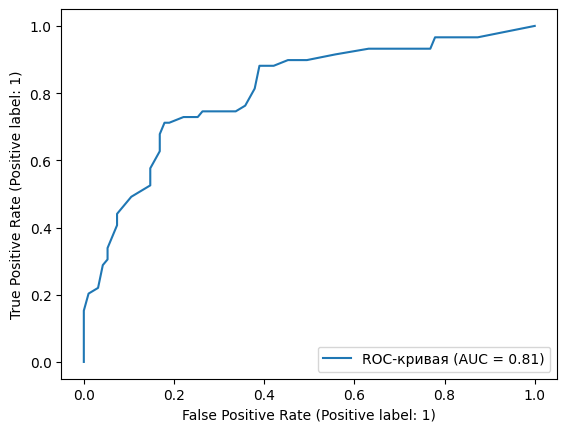

In [683]:
RocCurveDisplay.from_predictions(Y_test, Y_pred, name="ROC-кривая")

In [684]:
##Метод опорных векторов(Support vector machine)

In [685]:
svmRegressor = svm.SVC()

In [686]:
svmRegressor.get_params()
param_grid = [
    {
        'C': [1, 10, 100, 1000], 'kernel': ['linear']
    }, 
    {
        'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf'] 
    }
]
grid_search = GridSearchCV(svmRegressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,Y)

grid_search.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [687]:
svmRegressor = svm.SVC(C=100, gamma=0.001, kernel='rbf')
svmRegressor.fit(data_train, Y_train)
Y_pred = svmRegressor.predict(data_test)

file = open('models/SupportVectorMachine.pkl', 'wb')
pickle.dump(svmRegressor, file, pickle.HIGHEST_PROTOCOL)
file.close()

file = open('bestParams/SupportVectorMachineParameters.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

print("Y:\n", list(Y_test.iloc[:5]))
print("Support Vector Machine прогноз Y:\n", list(Y_pred[:5]))

Y:

 [0, 1, 1, 1, 1]

Support Vector Machine прогноз Y:

 [0, 1, 1, 1, 1]


In [688]:
##Матрица ошибок

In [689]:
print("Матрица ошибок")
print(confusion_matrix(Y_test,Y_pred.round()))
print(classification_report(Y_test,Y_pred.round()))

Матрица ошибок

[[86  9]

 [26 33]]

              precision    recall  f1-score   support



           0       0.77      0.91      0.83        95

           1       0.79      0.56      0.65        59



    accuracy                           0.77       154

   macro avg       0.78      0.73      0.74       154

weighted avg       0.77      0.77      0.76       154




In [690]:
##оценка качества бинарной классификации

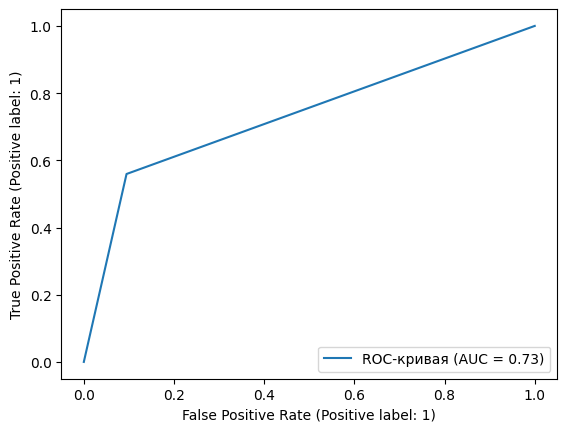

In [691]:

RocCurveDisplay.from_predictions(Y_test, Y_pred, name="ROC-кривая")

In [692]:
#Naive Bayes

In [693]:
nBRegressor = GaussianNB()

In [694]:
nBRegressor.get_params()
param_grid = [
    {
        'var_smoothing':[0.00000001, 0.000001, 0.001]
    } 
]
grid_search = GridSearchCV(nBRegressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,Y)

grid_search.best_params_

{'var_smoothing': 1e-08}

In [695]:
nBRegressor = GaussianNB(var_smoothing=1e-08)
nBRegressor.fit(data_train, Y_train)
Y_pred = nBRegressor.predict(data_test)

file = open('models/NaiveBayes.pkl', 'wb')
pickle.dump(nBRegressor, file, pickle.HIGHEST_PROTOCOL)
file.close()

file = open('bestParams/NaiveBayesParameters.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

print("Y:\n", list(Y_test.iloc[:5]))
print("Naive Bayes прогноз Y:\n", list(Y_pred[:5]))

Y:

 [0, 1, 1, 1, 1]

Naive Bayes прогноз Y:

 [0, 1, 1, 1, 1]


In [696]:
##Матрица ошибок

In [697]:
print("Матрица ошибок")
print(confusion_matrix(Y_test,Y_pred.round()))
print(classification_report(Y_test,Y_pred.round()))

Матрица ошибок

[[81 14]

 [20 39]]

              precision    recall  f1-score   support



           0       0.80      0.85      0.83        95

           1       0.74      0.66      0.70        59



    accuracy                           0.78       154

   macro avg       0.77      0.76      0.76       154

weighted avg       0.78      0.78      0.78       154




In [698]:
##оценка качества бинарной классификации

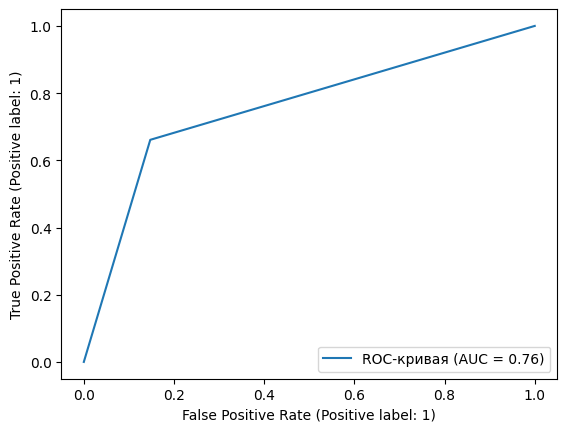

In [699]:
RocCurveDisplay.from_predictions(Y_test, Y_pred, name="ROC-кривая")

In [700]:
##Метод k ближайших соседей(KNN)

In [701]:
knnRegressor = KNeighborsClassifier()

In [702]:
knnRegressor.get_params()
param_grid = [
    {
        'leaf_size': [10, 15, 20], 'n_neighbors': [3, 5, 7], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }, 
    {
        'leaf_size': [10, 15, 25], 'n_neighbors': [2, 3, 4], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    } 
]
grid_search = GridSearchCV(knnRegressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,Y)

grid_search.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3}

In [703]:
knnRegressor = KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=3)
knnRegressor.fit(data_train, Y_train)
Y_pred = knnRegressor.predict(data_test)

file = open('models/KNN.pkl', 'wb')
pickle.dump(knnRegressor, file, pickle.HIGHEST_PROTOCOL)
file.close()

file = open('bestParams/KNNParameters.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

print("Y:\n", list(Y_test.iloc[:5]))
print("KNN прогноз Y:\n", list(Y_pred[:5]))

Y:

 [0, 1, 1, 1, 1]

KNN прогноз Y:

 [1, 1, 1, 0, 1]


In [704]:
##Матрица ошибок

In [705]:
print("Матрица ошибок")
print(confusion_matrix(Y_test,Y_pred.round()))
print(classification_report(Y_test,Y_pred.round()))

Матрица ошибок

[[77 18]

 [21 38]]

              precision    recall  f1-score   support



           0       0.79      0.81      0.80        95

           1       0.68      0.64      0.66        59



    accuracy                           0.75       154

   macro avg       0.73      0.73      0.73       154

weighted avg       0.74      0.75      0.75       154




In [706]:
##оценка качества бинарной классификации

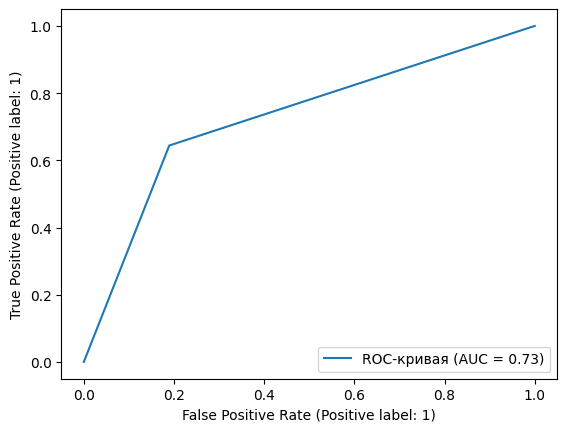

In [707]:
RocCurveDisplay.from_predictions(Y_test, Y_pred, name="ROC-кривая")